# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Getting Started with Images
Learn to load an image, display it, and save it back

- Color image : BlueGreenRed (BGR) order in OpenCV
- Gray image : 0-255 (black-gray-white)
- image start from up left (0)

### cv.imread()
- cv.IMREAD_COLOR (1): Loads a color image. Any transparency of image will be neglected. It is the default flag.
- cv.IMREAD_GRAYSCALE (0): Loads image in grayscale mode
- cv.IMREAD_UNCHANGED (-1): Loads image as such including alpha channel

In [414]:
img = cv.imread("lena.jpg", -1)

In [415]:
# By default, the flag is cv.WINDOW_AUTOSIZE. 
# cv.WINDOW_NORMAL, you can resize window.
cv.namedWindow('image', cv.WINDOW_NORMAL)

### cv.imshow()

In [416]:
cv.imshow("Display window", img)

# keyboard binding functions
# Waits for specified milliseconds for any keyboard event
# 0  = waits indefinitely for a key stroke
# can also be set to detect sepcific key strokes
k = cv.waitKey(0)

In [417]:
# destroys all the windows we created
# cv.destroyWindow() : pass the exact window name to destry a specific window
cv.destroyAllWindows()
k = cv.waitKey(1)

### cv.imwrite()


- cv2.IMWRITE_JPEG_QUALITY：0~100，default 95
- cv2.IMWRITE_PNG_COMPRESSION：0-9, default 1

In [418]:
img = cv.imread("lena.jpg", 1)
cv.imshow("Display window", img)
k = cv.waitKey(0)
if k == ord("x") or k == 27:
    cv.destroyAllWindows()
    cv.waitKey(1)
elif k == ord("s"):
    cv.imwrite("lena.jpg", img)
    # cv.imwrite('img_jpg100.jpg',new_img,[int(cv2.IMWRITE_JPEG_QUALITY),100])
    cv.destroyAllWindows()
    cv.waitKey(1)

In [419]:
plt.imsave("test.png", img2)

### plt.imshow(img, cmap='gray')

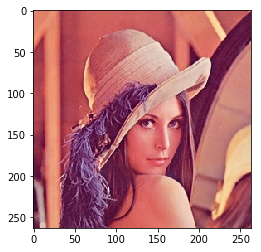

In [420]:
# opencv : BGR
img = cv.imread("lena.jpg", 1)

# matplotlib : RBG
img2 = img[:, :, ::-1]
plt.imshow(img2)

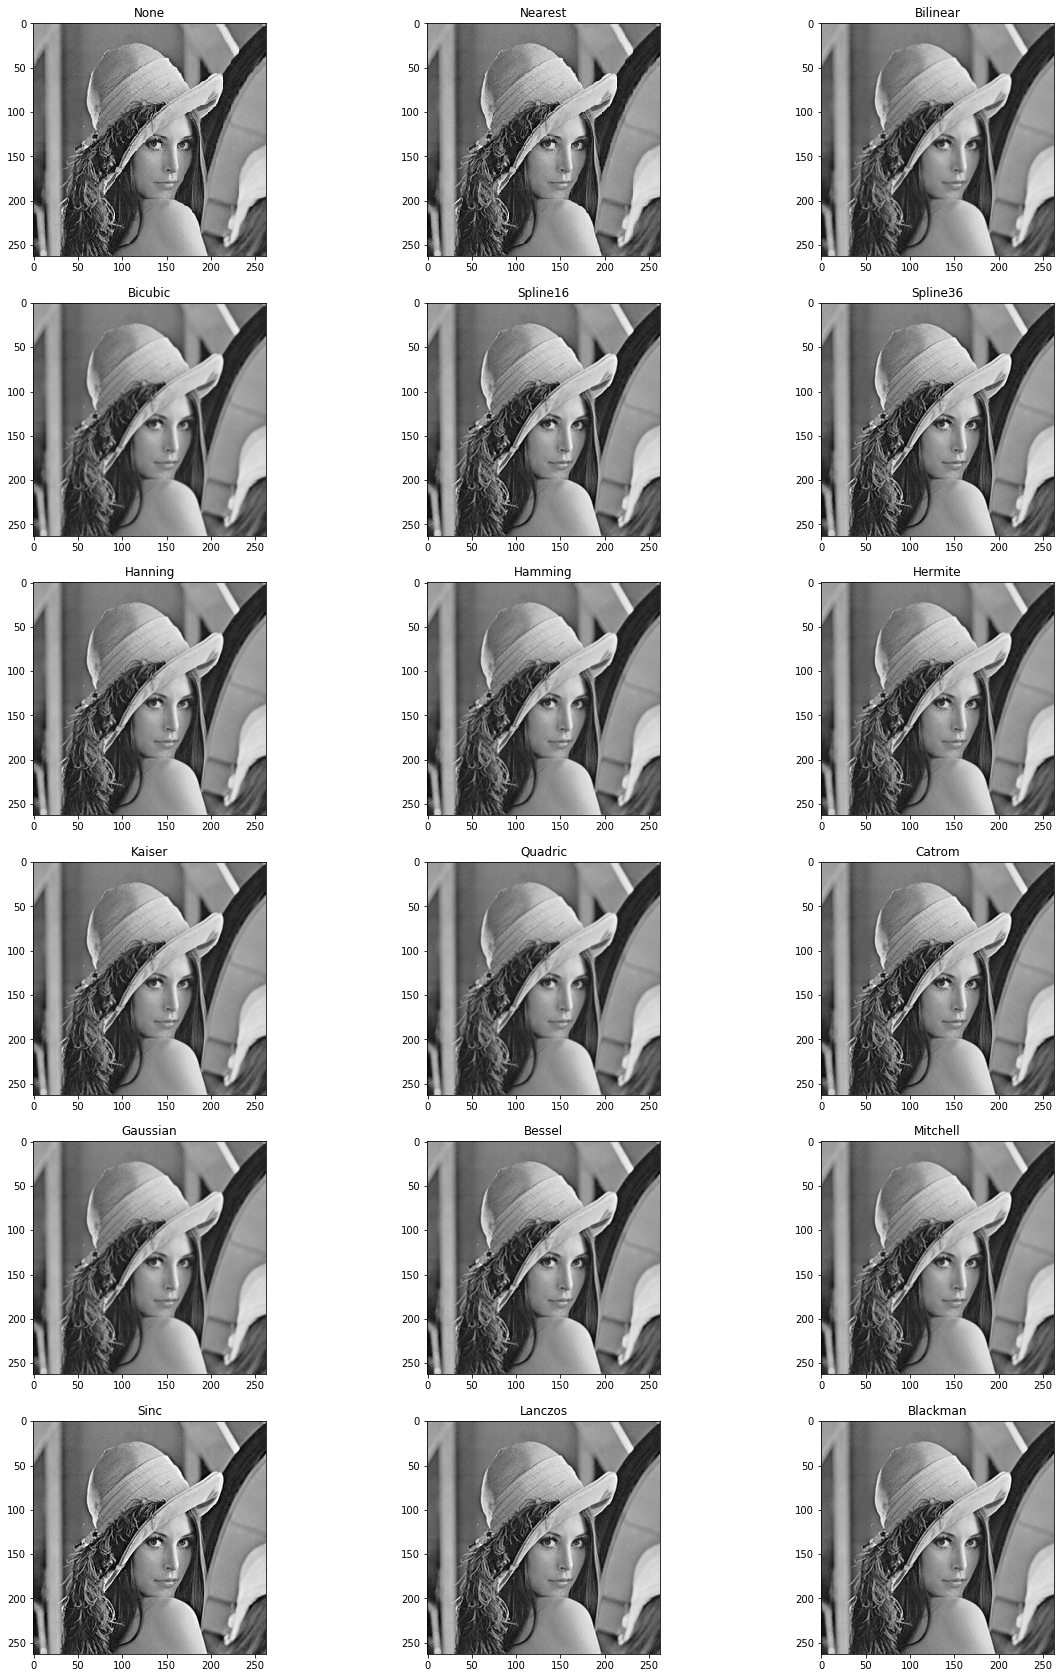

In [421]:
img = cv.imread("lena.jpg", 0)
interpolation_list = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman']

fig, axs = plt.subplots(6, 3, figsize=(20, 30))

for ax, interp in zip([a for ax in axs for a in ax], interpolation_list):
    ax.imshow(img, cmap='gray', interpolation=interp)
    ax.set_title(interp.capitalize())

## Getting Started with Videos
Learn to play videos, capture videos from a camera, and write videos

### cv.VideoCapture()
- argument : device index (0, 1) or name of a video file

In [422]:
# cap = cv.VideoCapture(0) # camera
cap = cv.VideoCapture('demo_video.mp4')


# cap.isOpened()
# cap.open()
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while(True):
    # Capture frame-by-frame
    # cap.read() return a bool
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv.imshow('frame', gray)
    
    # access some of the features of this video using cap.get(propId) 
    # check the frame width and height by cap.get(cv.CAP_PROP_FRAME_WIDTH) and cap.get(cv.CAP_PROP_FRAME_HEIGHT). 
    # modify it to 320x240. 
    # Just use ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,320)
    # ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,240).
    
    if cv.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()
k = cv.waitKey(1)

### cv.VideoWriter()
- output file name
- FourCC code : a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. The following codecs work fine for me.
    - `cv.VideoWriter_fourcc('M','J','P','G')or cv.VideoWriter_fourcc(*'MJPG')` for MJPG.
    - In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
    - In Windows: DIVX (More to be tested and added)
    - In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).

- Number of frames per second (fps)
- frame size
- isColor : True  encoder expect color frame, False - grayscale frame

In [23]:
cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv.VideoWriter('output.avi', fourcc, 20, (frame_width,  frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    frame = cv.flip(frame, 0)
    
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()
k = cv.waitKey(1)

In [4]:
img = np.zeros((300, 512, 3), np.uint8)
cv.namedWindow('image')

def nothing(x):
    pass


# RGB Track bar
cv.createTrackbar('R', 'image', 0, 255, nothing)
cv.createTrackbar('G', 'image', 0, 255, nothing)
cv.createTrackbar('B', 'image', 0, 255, nothing)

while(True):
    cv.imshow('image', img)
    k = cv.waitKey(1)
    if k == 27 or k == ord('q'):
        break

    # get values
    r = cv.getTrackbarPos('R', 'image')
    g = cv.getTrackbarPos('G', 'image')
    b = cv.getTrackbarPos('B', 'image')
    # set values
    img[:] = [b, g, r]
cv.destroyAllWindows()
cv.waitKey(-1)

### Trackbar

In [ ]:
def track_back(x):
    # change position
    capture.set(cv2.CAP_PROP_POS_FRAMES, x)


cv2.namedWindow('window')

capture = cv2.VideoCapture('demo_video.mp4')
# get nb frames
frames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
# get track bar
cv2.createTrackbar('process', 'window', 1, int(frames), track_back)

while(capture.isOpened()):
    ret, frame = capture.read()

    cv2.imshow('window', frame)
    if cv2.waitKey(30) == ord('q'):
        break
cv.destroyAllWindows()
cv.waitKey(-1)

## Accessing and Modifying pixel values
By its row and column coordinates. img[y, x], y= row, x = column
- For BGR image : returns an array of Blue, Green, Red values
- For grayscale image, just corresponding intensity is returned

In [423]:
img = cv.imread('lena.jpg', 0)
print("width :", len(img[0]))
print("high :", len(img))
print("value :", img[100, 100])
print(img.shape)

width : 263
high : 263
value : 137
(263, 263)


In [424]:
img = cv.imread('lena.jpg', 1)
print("width :", len(img[0]))
print("high :", len(img))
print("value :", img[100, 100])
print(img.shape)

width : 263
high : 263
value : [121 108 200]
(263, 263, 3)


Numpy is an optimized library for fast array calculations. So simply accessing each and every pixel value and modifying it will be very slow and it is discouraged.

The best way is use `img.item()` and `img.itemset()`. But `img.itemset()` can only modify 1 color.

In [425]:
for i in range(100):
    img[i,100] = [255,255,255]

In [426]:
# accessing RED value
img.item(10, 10, 2)

# modifying RED value
img.itemset((10,10,2), 100)

In [427]:
img.shape

(263, 263, 3)

In [428]:
img.size

207507

In [429]:
img.dtype

dtype('uint8')

## ROI (Regions of images) : ROI is obtained using Numpy indexing.

In [430]:
# selecting the face and copying it to another region in the image: 

In [452]:
img = cv.imread('lena.jpg', 1)

In [453]:
face = img[25:115, 60:200]

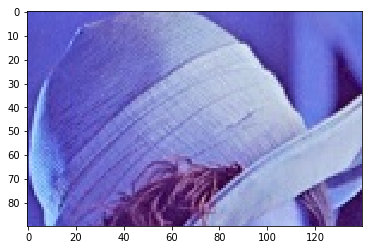

In [454]:
plt.imshow(face)

In [455]:
img[25+50:115+50, 60:200] = face

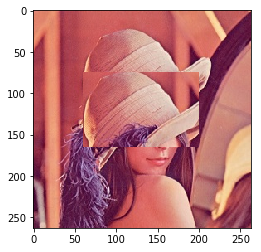

In [456]:
plt.imshow(img[:, :, ::-1])

In [458]:
img = cv.imread('lena.jpg', 1)

In [468]:
%%timeit
# slower
b, g, r = cv.split(img)

55.9 µs ± 4.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [469]:
%%timeit
# faster
b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]

1.17 µs ± 9.63 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [470]:
img = cv.merge((b, g, r))

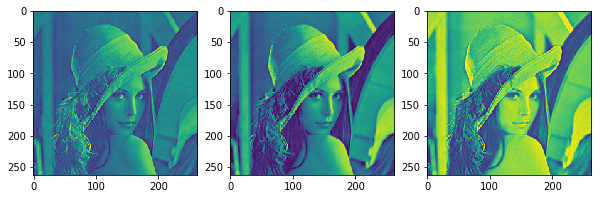

In [471]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(b)
axes[1].imshow(g)
axes[2].imshow(r)

## Changing Colorspace
- cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
- cv2.inRange()

In [473]:
img = cv.imread('lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

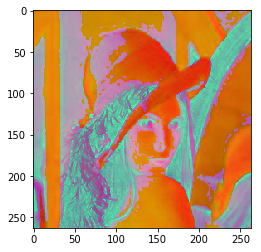

In [474]:
plt.imshow(img[:, :, ::-1])

In [475]:
[i for i in dir(cv) if i.startswith('COLOR_')]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

In [476]:
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv.cvtColor(blue, cv.COLOR_BGR2HSV)
print(hsv_blue)

green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

red = np.uint8([[[0, 0, 255]]])
hsv_red = cv.cvtColor(red, cv.COLOR_BGR2HSV)
print(hsv_red)

[[[120 255 255]]]
[[[ 60 255 255]]]
[[[  0 255 255]]]


In [477]:
# blue range
lower_blue = np.array([100, 110, 110])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([40, 90, 90])
upper_green = np.array([80, 255, 255])

lower_red = np.array([160, 120, 120])
upper_red = np.array([190, 255, 255])

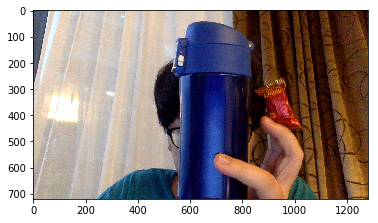

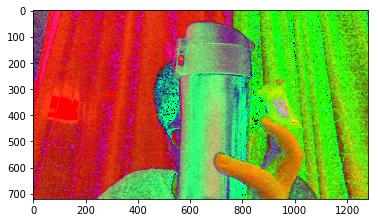

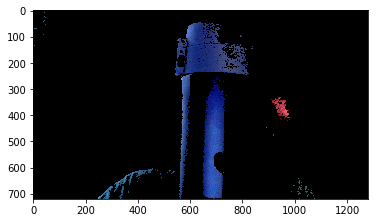

In [58]:
capture = cv.VideoCapture(0)

while True:
    
    ret, frame = capture.read()
    
    # BGR => HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # inrange(), put color between lower and upper to white, and other to black
    mask_blue = cv.inRange(hsv, lower_blue, upper_blue)
    mask_green = cv.inRange(hsv, lower_green, upper_green)
    mask_red = cv.inRange(hsv, lower_red, upper_red)
    mask = mask_blue + mask_green + mask_red
    
    # keep only blue part 
    res = cv.bitwise_and(frame, frame, mask=mask)
    
    plt.imshow(frame[:, :, ::-1])
    plt.show()
    plt.imshow(hsv[:, :, ::-1])
    plt.show()
    plt.imshow(res[:, :, ::-1])
    
    break

In [59]:
capture.release()

## Image Thresholding
- cv2.threshold()
- cv2.adaptiveThreshold()

In [478]:
img = cv.imread("gradient.jpg", 1)

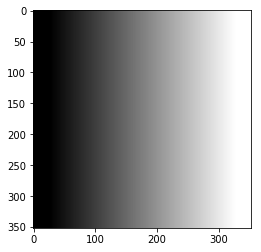

In [479]:
plt.imshow(img)

AxesSubplot(0.125,0.536818;0.227941x0.343182) Binary 0
AxesSubplot(0.398529,0.536818;0.227941x0.343182) Binary_Inv 1
AxesSubplot(0.672059,0.536818;0.227941x0.343182) Mask 7
AxesSubplot(0.125,0.125;0.227941x0.343182) Tozero 3
AxesSubplot(0.398529,0.125;0.227941x0.343182) Tozero_Inv 4
AxesSubplot(0.672059,0.125;0.227941x0.343182) Trunc 2


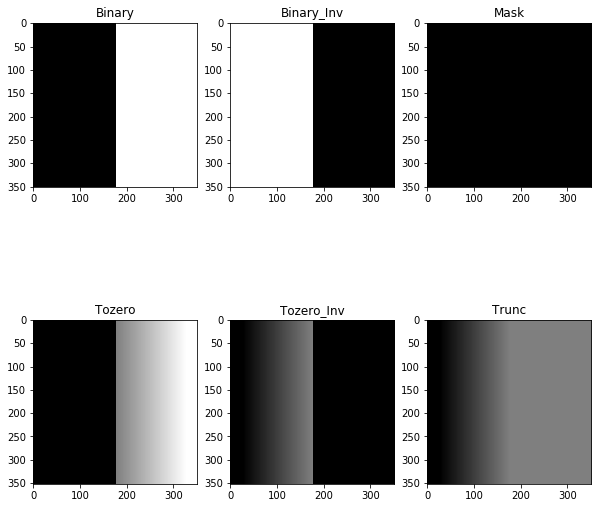

In [480]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes_lst = [a for ax in axes for a in ax]

for ax, name, thres in zip(axes_lst, ['Binary', 'Binary_Inv', 'Mask', 'Tozero', 'Tozero_Inv', 'Trunc'], [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_MASK, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV, cv.THRESH_TRUNC]):
    print(ax, name, thres)
    ret, th = cv.threshold(img, 127, 255, thres)
    ax.imshow(th)
    ax.set_title(name)

In [481]:
img = cv.imread("sudoku.jpg", 0)

In [482]:
img = cv.GaussianBlur(img, (5, 5), 0)

ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 7)
#ret, th2 = cv.threshold(th2, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 7)

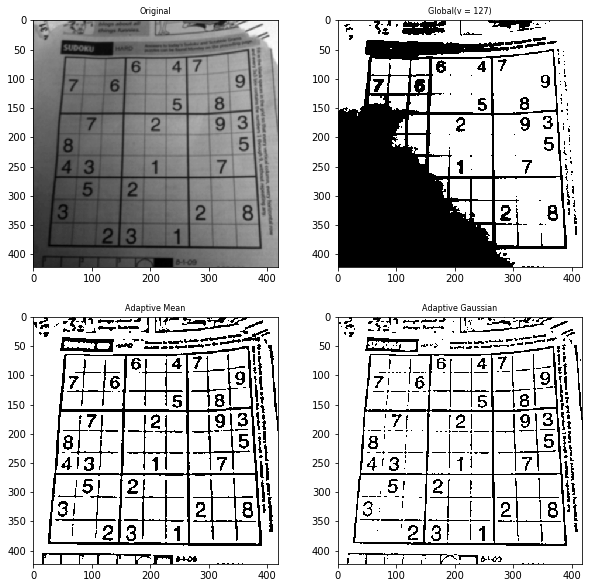

In [483]:
titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, a in enumerate([a for ax in axes for a in ax]):
    a.imshow(images[i], 'gray')
    a.set_title(titles[i], fontsize=8)


### Ostu Thresholding

In [484]:
img = cv2.imread('noisy.jpg', 0)

# Noram
ret1, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Ostu
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# first gaussian blur, then Ostu
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

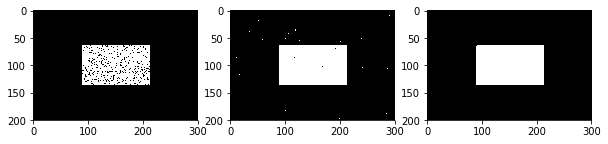

In [485]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(th1, 'gray')
axes[1].imshow(th2, 'gray')
axes[2].imshow(th3, 'gray')

## Image Geometric Transformation
### cv2.resize()

In [486]:
img = cv.imread("drawing.jpg")

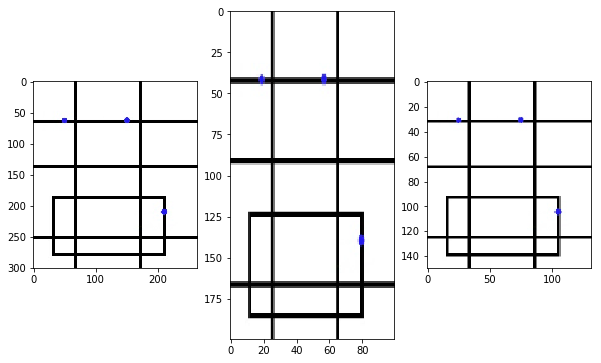

In [487]:
res = cv.resize(img, (100, 200))
res2 = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(res)
axes[2].imshow(res2)

### cv2.flip()

In [216]:
print(cv.flip.__doc__)

flip(src, flipCode[, dst]) -> dst
.   @brief Flips a 2D array around vertical, horizontal, or both axes.
.   
.   The function cv::flip flips the array in one of three different ways (row
.   and column indices are 0-based):
.   \f[\texttt{dst} _{ij} =
.   \left\{
.   \begin{array}{l l}
.   \texttt{src} _{\texttt{src.rows}-i-1,j} & if\;  \texttt{flipCode} = 0 \\
.   \texttt{src} _{i, \texttt{src.cols} -j-1} & if\;  \texttt{flipCode} > 0 \\
.   \texttt{src} _{ \texttt{src.rows} -i-1, \texttt{src.cols} -j-1} & if\; \texttt{flipCode} < 0 \\
.   \end{array}
.   \right.\f]
.   The example scenarios of using the function are the following:
.   *   Vertical flipping of the image (flipCode == 0) to switch between
.       top-left and bottom-left image origin. This is a typical operation
.       in video processing on Microsoft Windows\* OS.
.   *   Horizontal flipping of the image with the subsequent horizontal
.       shift and absolute difference calculation to check for a
.       vertical-a

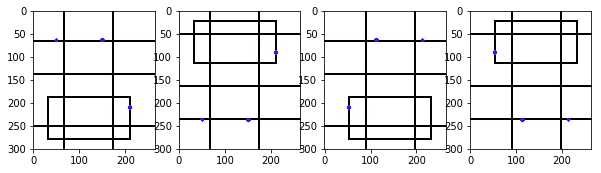

In [488]:
vertical_flip = cv.flip(img, 0)
horizontal_flip = cv.flip(img, 1)
hor_vert_flip = cv.flip(img, -1)


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(vertical_flip)
axes[2].imshow(horizontal_flip)
axes[3].imshow(hor_vert_flip)

### cv2.warpAffine() + cv2.getRotationMatrix2D() + cv2.getAffineTransform()

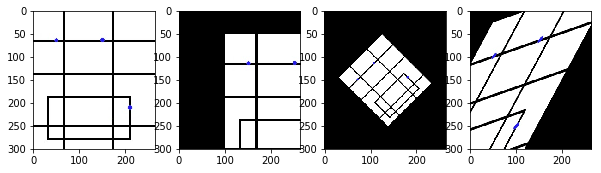

In [489]:
rows, cols = img.shape[:2]
# use numpy.float32()
# x->100, y->50
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))

# getRotationMatrix2D(center, angle, scale)
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 0.5)
dst2 = cv2.warpAffine(img, M, (cols, rows))

# 3 point before transformation
pts1 = np.float32([[50, 65], [150, 65], [210, 210]])
# 3 point after transformation
pts2 = np.float32([[50, 100], [150, 65], [100, 250]])
# build transform matrix
M = cv2.getAffineTransform(pts1, pts2)
dst3 = cv2.warpAffine(img, M, (cols, rows))

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(dst)
axes[2].imshow(dst2)
axes[3].imshow(dst3)

In [490]:
rows, cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols / 2, rows / 2), -45, 2)
dst3 = cv2.warpAffine(dst2, M, (cols, rows))

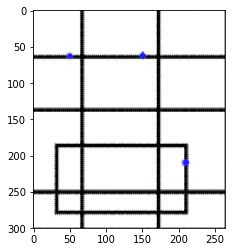

In [491]:
plt.imshow(dst3)

### Perspective Transformation : 2D->3D->2D

In [492]:
img = cv.imread("card.jpg")

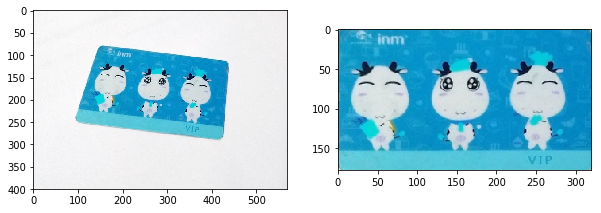

In [493]:
pts1 = np.float32([[148, 80], [437, 114], [94, 247], [423, 288]])
pts2 = np.float32([[0, 0], [320, 0], [0, 178], [320, 178]])
M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (320, 178))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(dst)

## Image Blending

In [494]:
img1 = cv2.imread('lena_small.jpg')
img2 = cv2.imread('opencv-logo-white.png')

In [495]:
h, w = img1.shape[:-1]

In [496]:
img1big = cv.resize(img1, (h*2, w*2))

### cv2.add() : high, width, values must be the same

In [497]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x, y))  # 250+10 = 260 => 255
print(x + y)  # 250+10 = 260 % 256 = 4

[[255]]
[4]


In [498]:
img = cv.add(img1, img2)

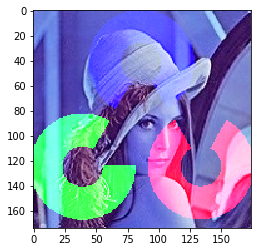

In [499]:
plt.imshow(img)

### cv2.addWeighted()

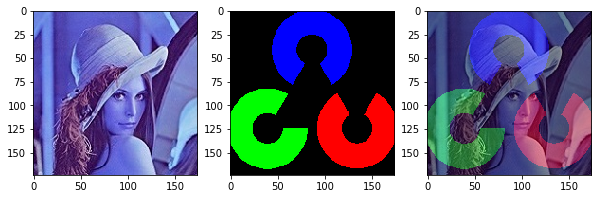

In [500]:
# if alpha = 1 and beta = 1, then equal to add two images
# dst=α×img1+β×img2+γ
alpha = 0.6
beta = 0.4
y = 0
res = cv2.addWeighted(img1, alpha, img2, beta, y)
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(res)

### cv2.bitwise_and() & mask

In [501]:
# put the logo on the top left
# roi : top left
rows, cols = img2.shape[:2]
roi = img1big[:rows, :cols]

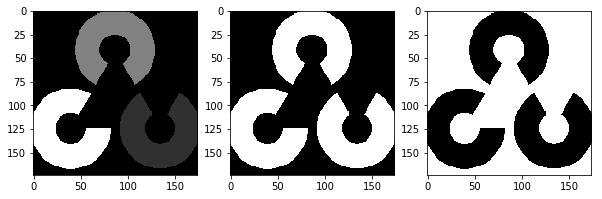

In [502]:
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img2gray, 'gray')
axes[1].imshow(mask, 'gray')
axes[2].imshow(mask_inv, 'gray')

In [503]:
# remove backgroup
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)
# add
dst = cv2.add(img1_bg, img2)
# copy to img1
img1big[:rows, :cols] = dst

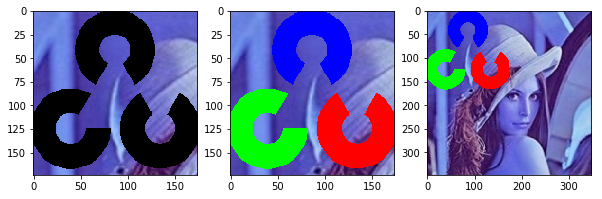

In [504]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img1_bg, 'gray')
axes[1].imshow(dst, 'gray')
axes[2].imshow(img1big, 'gray')

## Contrast and Brightness

### Calculation 
- g(x)=α*f(x)+β
- a(>0)
- β gain and offset value 
- contract : a+β
- brightness : β


- a = 1.68
- b = 125*(1-1.68)

In [507]:
img = cv.imread("lena.jpg")

# a = 1.5, β=10
a = 1.68
b = 100*(1-1.68)
res = np.uint8(np.clip(a*img+b, 0, 255))

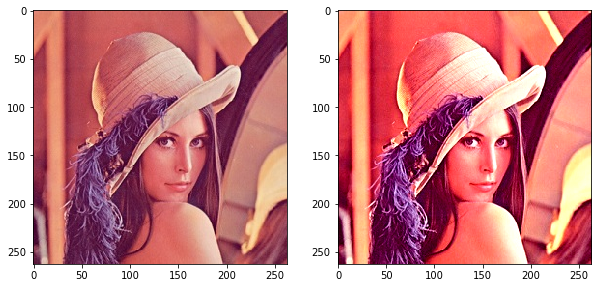

In [508]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img[:, :, ::-1])
axes[1].imshow(res[:, :, ::-1])

In [509]:
img = cv.imread("lena.jpg")
cv.namedWindow('image')

def nothing(x):
    pass


# RGB Track bar
cv.createTrackbar('brightness', 'image', 0, 100, nothing)
cv.createTrackbar('contrast', 'image', 100, 300, nothing)

temp = img.copy()


while(True):
    cv.imshow('image', temp)
    k = cv.waitKey(1)
    if k == 27 or k == ord('q'):
        break

    # get values
    brightness = cv2.getTrackbarPos('brightness', 'image')
    contrast = cv2.getTrackbarPos('contrast', 'image') * 0.01

    # set values
    temp = np.uint8(np.clip(contrast*img+brightness, 0, 255))
cv.destroyAllWindows()
cv.waitKey(-1)
print(brightness, contrast)

58 0.44


## Padding and Convolution

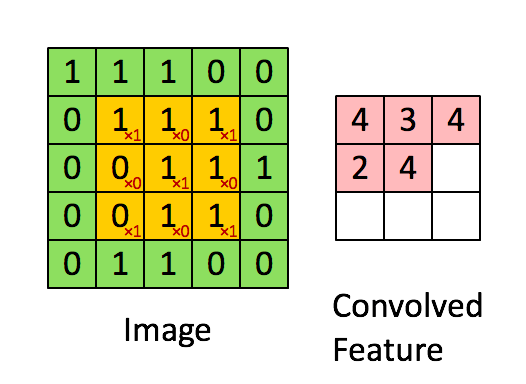

### cv2.copyMakeBorder() : add padding to image
- src : image
- top, bottom, left, right: number of px
- bordertype : 
    - cv2.BORDER_CONSTANT : fill with a constant
    - cv2.BORDER_DEFAULT (default, and normally the best): fill with mirror-symmetrical pixels 

In [510]:
img = cv.imread("6_by_6.bmp", 0)

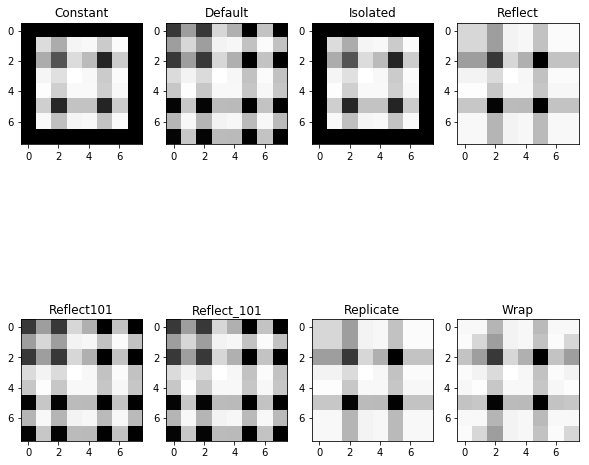

In [511]:
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
axes = [a for ax in axes for a in ax]
title = ["Constant", "Default", "Isolated", "Reflect", "Reflect101", "Reflect_101", "Replicate", "Wrap"]
nb = 0
for ax, border in zip(axes, [cv.BORDER_CONSTANT, cv.BORDER_DEFAULT, cv.BORDER_ISOLATED, cv.BORDER_REFLECT, cv.BORDER_REFLECT101, cv.BORDER_REFLECT_101, cv.BORDER_REPLICATE, cv.BORDER_WRAP]):
    img_border = cv.copyMakeBorder(img, 1, 1, 1, 1, border)
    ax.imshow(img_border, 'gray')
    ax.set_title(title[nb])
    nb+=1

In [512]:
img_constant = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=0)
img_default = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_DEFAULT)

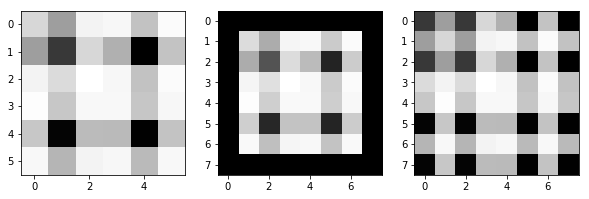

In [513]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_constant, 'gray')
axes[2].imshow(img_default, 'gray')

In [514]:
print(img_default)

[[ 81 166  81 213 181  34 197  34]
 [166 213 166 237 240 196 243 196]
 [ 81 166  81 213 181  34 197  34]
 [217 237 217 247 240 196 243 196]
 [200 245 200 241 241 199 240 199]
 [ 38 200  38 190 189  35 197  35]
 [185 241 185 237 240 189 241 189]
 [ 38 200  38 190 189  35 197  35]]


### cv2.filter2D()

In [515]:
img = cv.imread("lena.jpg")

In [516]:
# convolution kernel
kernel = np.ones((3, 3), np.float32) / 10

# ddepth : depth of the destination image
# ddepth = -1 means same as the source image
dst = cv2.filter2D(img, ddepth=-1, kernel=kernel)

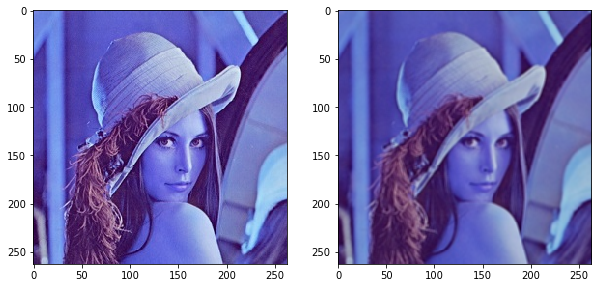

In [517]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(dst)

## Smoothing Image

Regarding filtering and blurring, actually they all belong to convolution, and only the convolution kernel is different between different filtering methods (for linear filtering).

- Low-pass filter is blur : allow low-frequency signals to pass. The edges and noise in the image are equivalent to the high-frequency part, so the low-pass filter is used to remove noise and smooth and blur the image.

- High-pass filter is sharpening : used to enhance the edge of the image and sharpen it.

Common noises include salt and pepper noise and Gaussian noise. Salt and pepper noise can be understood as spots, black or white points that randomly appear in the image; Gaussian noise can be understood as noise caused by lighting and other reasons when taking pictures. 

When you don't know what filter to use :
- Gaussian filter (cv2.GaussianBlur()) : first try this
- Average filter (cv2.blur()) : then this
- Median filter (cv2.medianBlur()) : for speckle and salt and pepper noise
- Bilateral filtering cv2.bilateralFilter() : to remove noise while retaining as much edge information as possible
- Speckle and salt and pepper noise prefer the median filter cv2.medianBlur().


- Linear filtering methods: mean filtering, box filtering, Gaussian filtering (relatively fast).
- Non-linear filtering methods: median filtering, bilateral filtering (relatively slow speed). 

### Averaging : cv2.blur() & cv2.boxFiler()

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

In [38]:
img = cv.imread('lena.jpg')
img2 = cv.blur(img, (3, 3))
# if normalize=True, equal to blur
# if you don't want to use a normalized box filter, use cv.boxFilter(). Pass an argument normalize=False to the function.
img3 = cv.boxFilter(img, ddepth=-1, ksize=(3, 3), normalize=True)
img4 = cv.boxFilter(img, ddepth=-1, ksize=(3, 3), normalize=False)

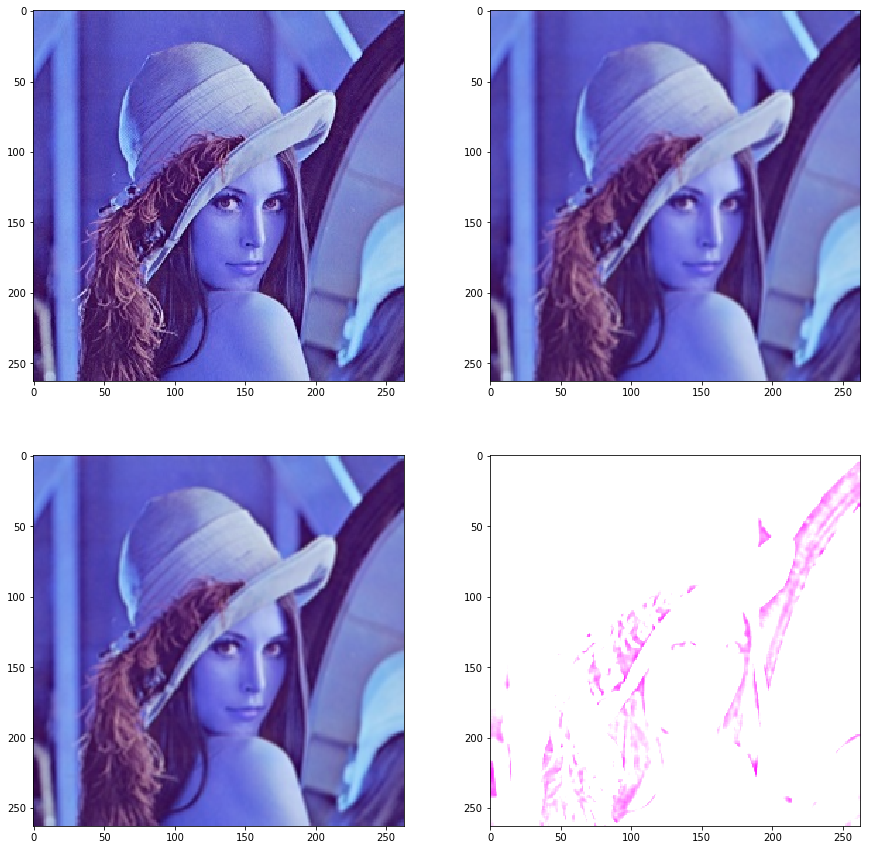

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].imshow(img)
axes[0, 1].imshow(img2)
axes[1, 0].imshow(img3)
axes[1, 1].imshow(img4)

### cv2.GaussianBlur()
- Blurring an image by a Gaussian function.
- reduce image noise and reduce detail.
- pre-processing stage in computer vision algorithms in order to enhance image structures at different scales

Argument
- ksize : specify the width and height of the kernel which should be positive and odd. 
- sigmaX and sigmaY : specify the standard deviation in the X and Y directions. 
If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

In [70]:
cv.getGaussianKernel(5, 0)

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

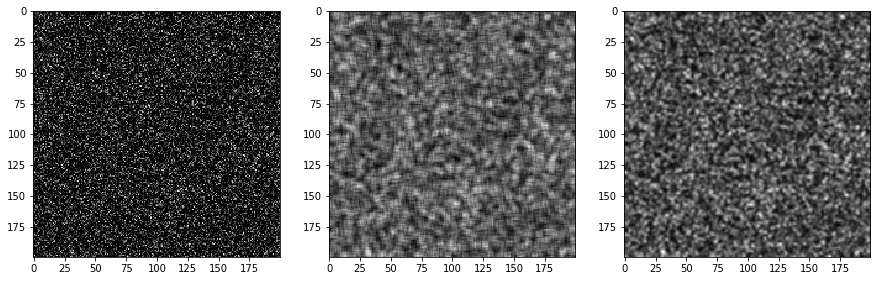

In [62]:
img = cv.imread('gaussian_noise.bmp', 0)

blur = cv.blur(img, (5, 5))
gaussian = cv.GaussianBlur(img, ksize=(5, 5), sigmaX=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(img, 'gray')
axes[1].imshow(blur, 'gray')
axes[2].imshow(gaussian, 'gray')

### cv2.medianBlur()
- takes the median of all the pixels under the kernel area and the central element is replaced with this median value. 
- highly effective against salt-and-pepper noise in an image. 

Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

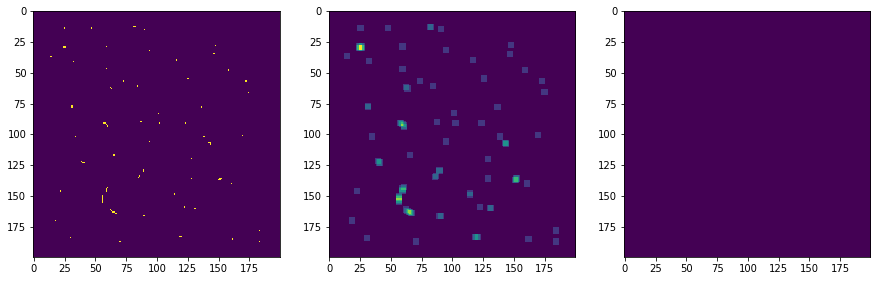

In [64]:
img = cv.imread('salt_noise.bmp', 0)
blur = cv.blur(img, (5, 5))
median = cv.medianBlur(img, 5)


fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(img)
axes[1].imshow(blur)
axes[2].imshow(median)

### cv2.bilateralFilter()

cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

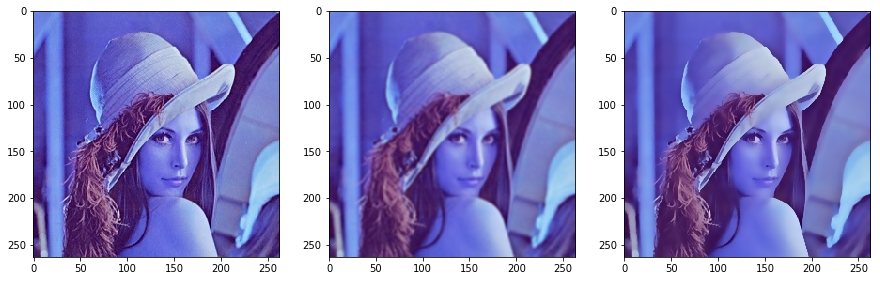

In [66]:
img = cv.imread('lena.jpg')
gau = cv.GaussianBlur(img, (5, 5), 0)
blur = cv.bilateralFilter(img, 9, 75, 75)

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(img)
axes[1].imshow(gau)
axes[2].imshow(blur)

### Image Gradients

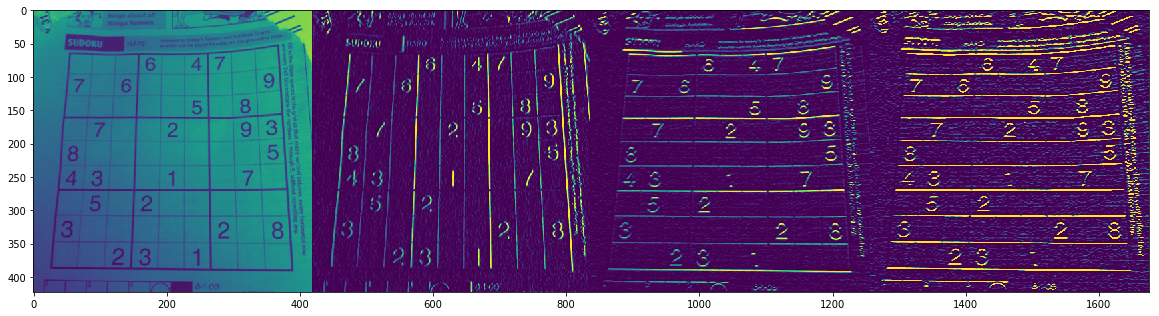

In [79]:
img = cv.imread('sudoku.jpg', 0)

# vertical
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)

dst_v = cv.filter2D(img, -1, kernel)

# horizontal
dst_h = cv.filter2D(img, -1, kernel.T)

dst_hv = cv.filter2D(dst_h, -1, kernel.T)


plt.figure(figsize=(20, 20))
plt.imshow(np.hstack((img, dst_v, dst_h, dst_hv)))


Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges. 

Sobel / Prewitt / Scharr

Laplacian

In [84]:
sobelx = cv.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv.Sobel(img, -1, 0, 1, ksize=3)
laplacian = cv.Laplacian(img, -1)

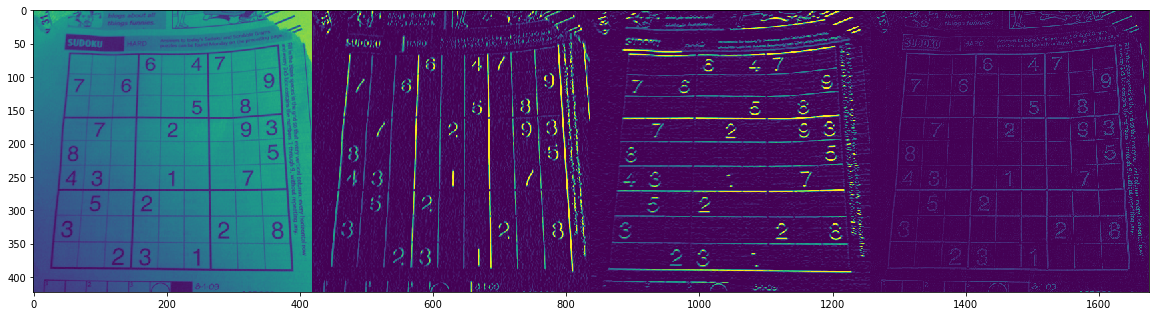

In [85]:
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack((img, sobelx, sobely, laplacian)))

### Edge Detection

We use the low-pass filtering to blur the image. And now use high-pass filtering to shape the image

In [121]:
img = cv.imread("handwriting.jpg", 0)

# @param threshold1 first threshold for the hysteresis procedure.
# @param threshold2 second threshold for the hysteresis procedure.
# best : 2:1 and 3:1
edges1 = cv.Canny(img, threshold1=30, threshold2=70)

# split first by threshold have better result
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

edges2 = cv.Canny(thresh, 30, 70)

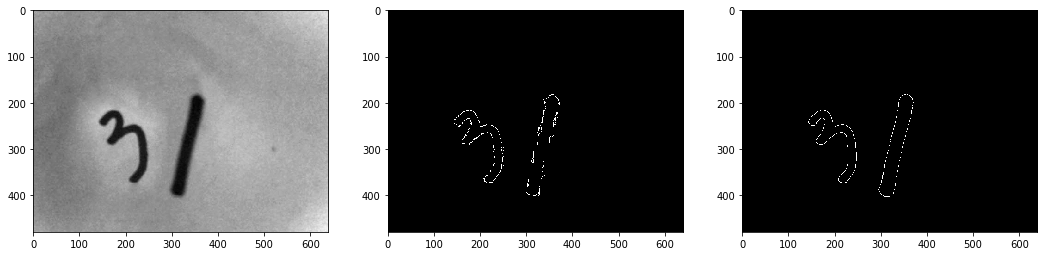

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 18))
axes[0].imshow(img, 'gray')
axes[1].imshow(edges1, 'gray')
axes[2].imshow(edges2, 'gray')

In [130]:
def track_back(x):
    pass


img = cv.imread('sudoku.jpg', 0)
cv.namedWindow('window')

cv.createTrackbar('maxVal', 'window', 100, 255, track_back)
cv.createTrackbar('minVal', 'window', 200, 255, track_back)

while(True):
    max_val = cv.getTrackbarPos('maxVal', 'window')
    min_val = cv.getTrackbarPos('minVal', 'window')

    edges = cv.Canny(img, min_val, max_val)
    cv.imshow('window', edges)

    if cv.waitKey(30) == 27:
        print(min_val, max_val)
        break
cv.destroyAllWindows()
cv.waitKey(-1)


43 77


27

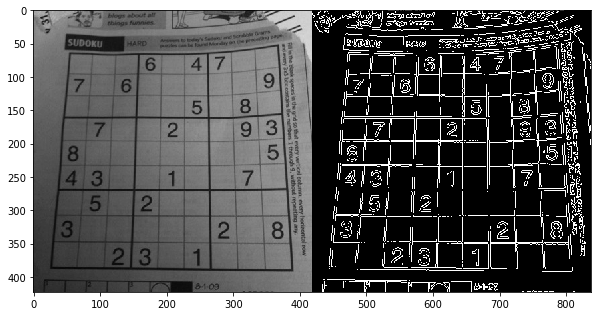

In [139]:
edges = cv.Canny(img, 43, 77)
plt.figure(figsize=(10, 10))
plt.imshow(np.hstack((img, edges)), 'gray')

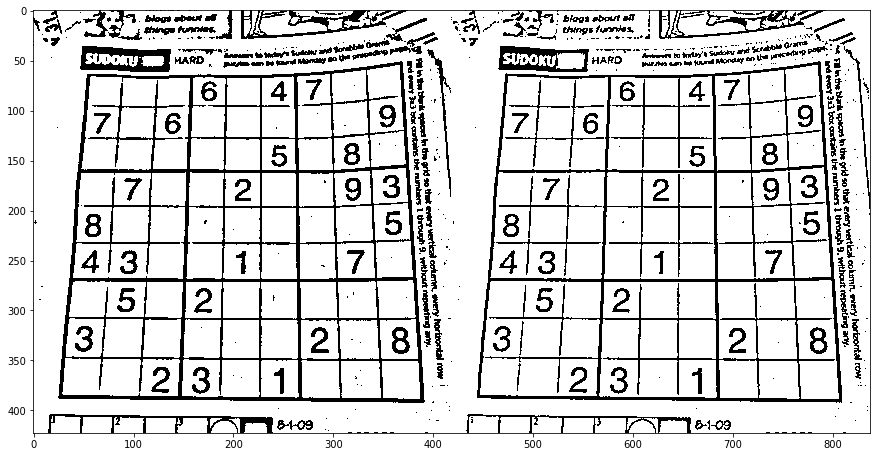

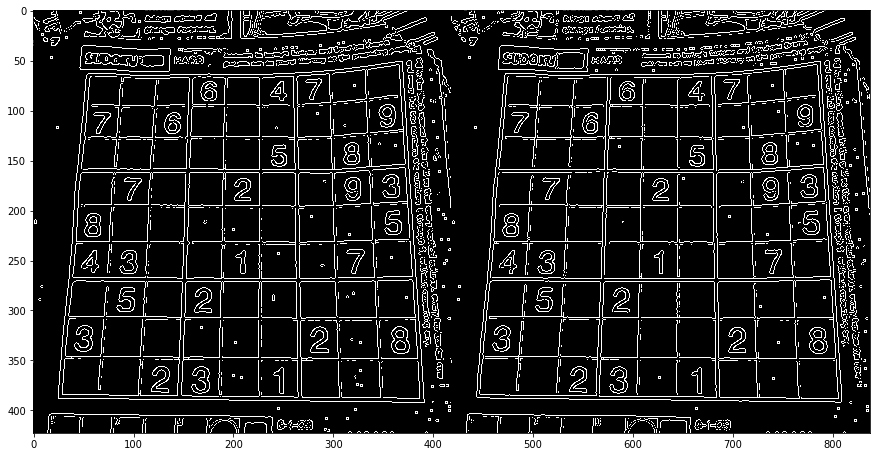

In [157]:
thres_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 7)
thres_gaussian = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 7)
plt.figure(figsize=(15, 15))
plt.imshow(np.hstack((thres_mean, thres_gaussian)), 'gray')
plt.show()

edges_tmean = cv.Canny(thres_mean, 43, 77)
edges_tgaus = cv.Canny(thres_gaussian, 43, 77)
plt.figure(figsize=(15, 15))
plt.imshow(np.hstack((edges_tmean, edges_tgaus)), 'gray')


## Morphological Transformations
- learn different morphological operations like Erosion, Dilation, Opening, Closing etc.

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

### cv2.erode()

The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

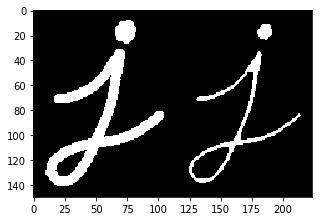

In [160]:
img = cv.imread('j.bmp', 0)

kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(img, kernel)

plt.figure(figsize=(5, 5))
plt.imshow(np.hstack((img, erosion)), 'gray')

The erode use convolution (so need kernel). can use cv2.getStructuringElement() to get different structure

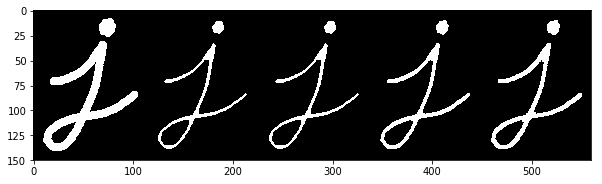

In [168]:
kernel1 = np.ones((5, 5), np.uint8)
erosion1 = cv.erode(img, kernel1)

kernel2 = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
erosion2 = cv.erode(img, kernel2)

kernel3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
erosion3 = cv.erode(img, kernel3)

kernel4 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
erosion4 = cv.erode(img, kernel4)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, erosion1, erosion2, erosion3, erosion4)), 'gray')

### cv2.dilate()

It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. 

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object. 

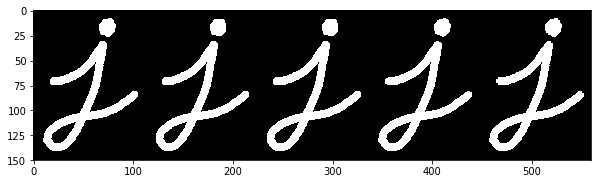

In [172]:
dilation1 = cv.dilate(erosion1, kernel1)
dilation2 = cv.dilate(erosion2, kernel2)
dilation3 = cv.dilate(erosion3, kernel3)
dilation4 = cv.dilate(erosion4, kernel4)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, dilation1, dilation2, dilation3, dilation4)), 'gray')

### cv2.morphologyEx() : erode + dilate
- Opening - cv2.MORPH_OPEN : erode => dilate
- Closing - cv2.MORPH_CLOSE : dilate => erode

If there are many irrelevant small areas outside our target object, use the open operation to remove them; if there are many small black holes inside the object, use the closed operation to fill them out. 

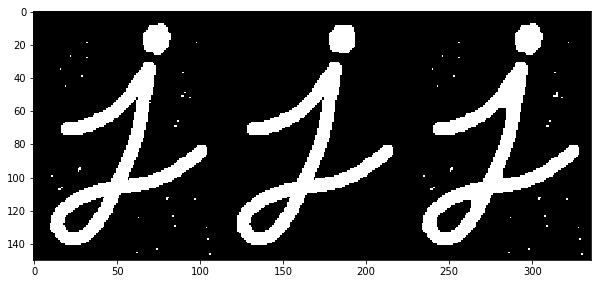

In [174]:
img = cv.imread('j_noise_out.bmp', 0)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, opening, closing)), 'gray')

Others : 
- cv2.MORPH_GRADIENT : dilation - erosion
- cv2.MORPH_TOPHAT : src - opening
- cv2.MORPH_BLACKHAT : closing - src

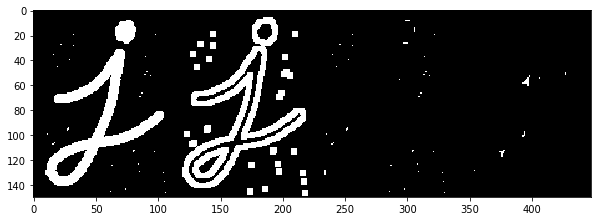

In [176]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, gradient, tophat, blackhat)), 'gray')

## Contours
The contour is continuous, the edges are not all continuous.

Finding contours is for white objects. Make sure that the object is white and the background is black. Otherwise, many people will find the outermost frame of the picture when looking for the contour. 

### cv2.findContours()
- image
- mode : contour retrieval mode, see #RetrievalModes
- method : contour approximation method, see #ContourApproximationModes
- offset : optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

In [238]:
img = cv.imread('handwriting.jpg', 0)
ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

contours, hierarchy = cv.findContours(thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

4


### Contour Hierarchy
hierarchy = [Next, Previous, First Child, Parent]

When we found the contours in image using cv.findContours() function, we have passed an argument, Contour Retrieval Mode. We usually passed cv.RETR_LIST or cv.RETR_TREE and it worked nice.

Sometimes objects are in different locations. But in some cases, some shapes are inside other shapes. Just like nested figures. In this case, we call outer one as parent and inner one as child. This way, contours in an image has some relationship to each other. And we can specify how one contour is connected to each other, like, is it child of some other contour, or is it a parent etc. Representation of this relationship is called the Hierarchy.

### cv2.drawContours()
- image
- contours
- contourIdx : parameter indicating a contour to draw, if negative, all the contours are drawn
- color : color of the contours
- thickness : thickness of lines the contours are drawn with. If negative, the contour interiors are drawn

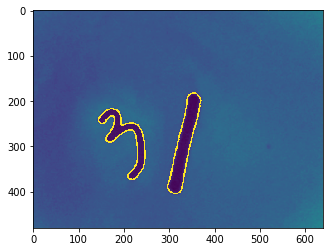

In [217]:
drawimg = cv.drawContours(img, contours, contourIdx=-1, color=(255, 0, 0), thickness=2)
plt.imshow(drawimg)

In [245]:
all_img = []
for i in range(4):
    img = cv.imread('handwriting.jpg', 0)
    ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
    cnt = contours[i]
    cimg = cv.drawContours(img, [cnt], 0, (255, 0, 0), 2)
    all_img.append(cimg)

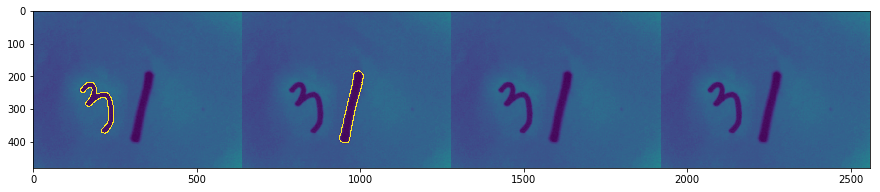

In [247]:
plt.figure(figsize=(15, 15))
plt.imshow(np.hstack(tuple(all_img)))

## Contour Features
To find the different features of contours, like area, perimeter, centroid, bounding box etc.

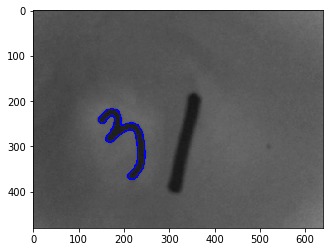

In [265]:
img = cv.imread('handwriting.jpg', 0)
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, mode=3, method=2)

# select number 3
cnt = contours[0]

img_color1 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_color2 = np.copy(img_color1)
plt.imshow(cv.drawContours(img_color1, [cnt], 0, (0, 0, 255), 2))

In [266]:
area = cv.contourArea(cnt)
area

4386.5

In [267]:
cv.countNonZero(img)

307200

In [268]:
# True indicates that the contour is closed 
perimeter = cv.arcLength(cnt, True)(x, y), radius = cv2.minEnclosingCircle(cnt)
(x, y, radius) = np.int0((x, y, radius))  # 圆心和半径取整
cv2.circle(img_color2, (x, y), radius, (0, 0, 255), 2)
perimeter

585.7716410160065

In [269]:
M = cv.moments(cnt)

In [270]:
# area
M['m00']

4386.5

### Bounding rectangle 
- blue : contours
- red : min area
- green : bounding

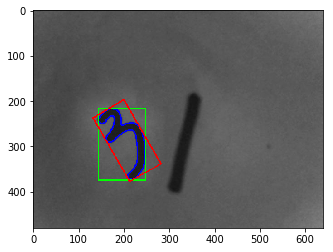

In [264]:
x, y, w, h = cv.boundingRect(cnt)
cv.rectangle(img_color1, (x, y), (x + w, y + h), (0, 255, 0), 2)

rect = cv.minAreaRect(cnt) 
box = np.int0(cv.boxPoints(rect)) # float to int

res = cv.drawContours(img_color1, [box], 0, (255, 0, 0), 2)

plt.imshow(res)

### Minimum Enclosing circle 

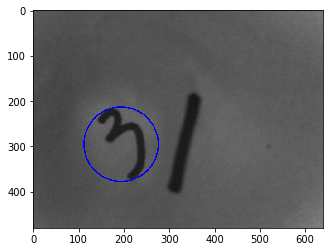

In [272]:
(x, y), radius = cv.minEnclosingCircle(cnt)
(x, y, radius) = np.int0((x, y, radius))
plt.imshow(cv.circle(img_color2, (x, y), radius, (0, 0, 255), 2))

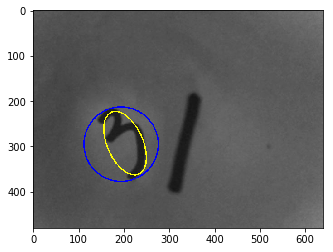

In [277]:
ellipse = cv.fitEllipse(cnt)
plt.imshow(cv.ellipse(img_color2, ellipse, (255, 255, 0), 2))

### Match Shapes

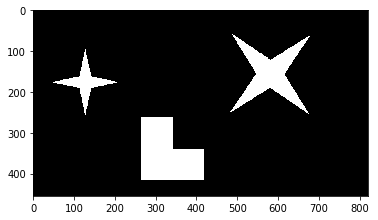

In [281]:
img = cv.imread('shapes.jpg', 0)
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, 3, 2)
img_color = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)
plt.imshow(img_color)

In [282]:
cnt_a, cnt_b, cnt_c = contours[0], contours[1], contours[2]
print(cv.matchShapes(cnt_b, cnt_b, 1, 0.0))  # 0.0
print(cv.matchShapes(cnt_b, cnt_c, 1, 0.0))  # 2.17e-05
print(cv.matchShapes(cnt_b, cnt_a, 1, 0.0))  # 0.418

0.0
2.176955476018705e-05
0.4181711500194456


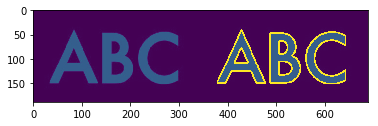

In [291]:
img = cv.imread('abc.jpg', 0)
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, 3, 2)

img2 = np.copy(img)
img2 = cv.drawContours(img2, contours, contourIdx=-1, color=(255, 0, 0), thickness=2)

b, c, a = contours[0], contours[3], contours[4]

bimg = cv.drawContours(np.copy(img), b, contourIdx=-1, color=(255, 0, 0), thickness=2)
cimg = cv.drawContours(np.copy(img), c, contourIdx=-1, color=(255, 0, 0), thickness=2)
aimg = cv.drawContours(np.copy(img), a, contourIdx=-1, color=(255, 0, 0), thickness=2)

plt.imshow(np.hstack((img, img2)))

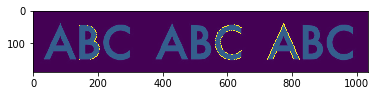

In [292]:
plt.imshow(np.hstack((bimg, cimg, aimg)))

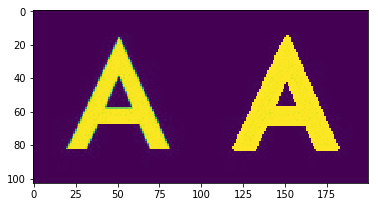

In [289]:
img_a = cv.imread('template_a.jpg', 0)
_, th = cv.threshold(img_a, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(th, 3, 2)


imga2 = np.copy(img_a)
imga2 = cv.drawContours(imga2, contours, contourIdx=-1, color=(255, 0, 0), thickness=2)

plt.imshow(np.hstack((img_a, imga2)))

template_a = contours[0]

In [293]:
print(cv.matchShapes(a, template_a, 1, 0.0))  # 0.02557(最相似)
print(cv.matchShapes(b, template_a, 1, 0.0))  # 0.80585
print(cv.matchShapes(c, template_a, 1, 0.0))  # 3.26050

0.02557032687410707
0.8058589058365455
3.260500788181953


## Histograms

So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram. Below is an image from Cambridge in Color website, and I recommend you to visit the site for more details.

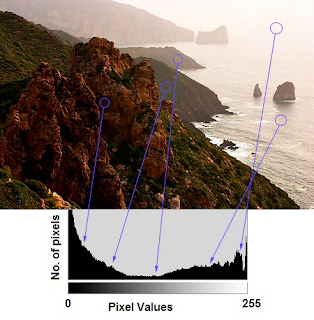

- dims: number of parameters for which we collect the data. gray = 1, color = 3
- range: range of intensity values you want to measure. Normally, it is [0,256], ie all intensity values.
- bins: The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram. But consider, what if you need not find the number of pixels for all pixel values separately, but number of pixels in a interval of pixel values? say for example, you need to find the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. 

### cv2.calcHist(images, channels, mask, histSize, ranges)
- images
- channels = dims : gray 0, B/G/R put 0/1/2
- mask : area to calculate, None if whole picture
- histSize = bins
- ranges = range

In [327]:
img = cv.imread('hist.jpg', 0)

In [328]:
hist1 = cv.calcHist([img], [0], None, [256], [0, 256])

In [329]:
hist2 = np.bincount(img.ravel(), minlength=256)

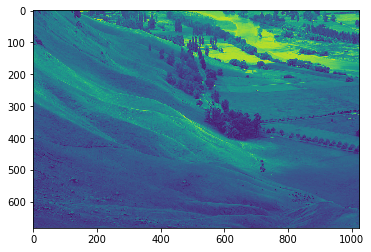

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

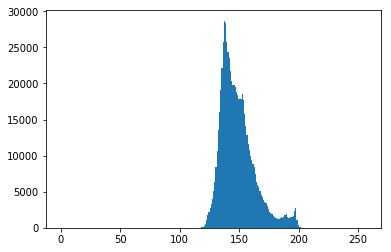

In [330]:
plt.imshow(img), plt.show()
plt.hist(img.ravel(), 256, [0, 256])

## Histogram Equalization 
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

To read : https://en.wikipedia.org/wiki/Histogram_equalization

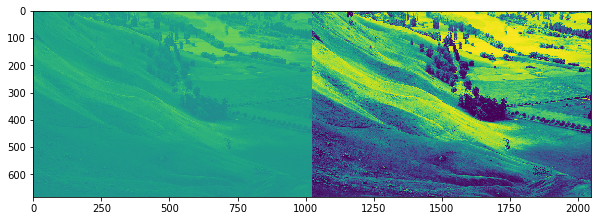

In [325]:
img = cv.imread('hist.jpg', 0)
equ = cv.equalizeHist(img)

plt.figure(figsize=(10, 10))
plt.imshow(np.hstack((img, equ)))

### CLAHE (Contrast Limited Adaptive Histogram Equalization) 

The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea. For example, below image shows an input image and its result after global histogram equalization.

In [339]:
img = cv.imread("tsukuba.jpg", 0)

In [340]:
equ = cv.equalizeHist(img)

In [341]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)

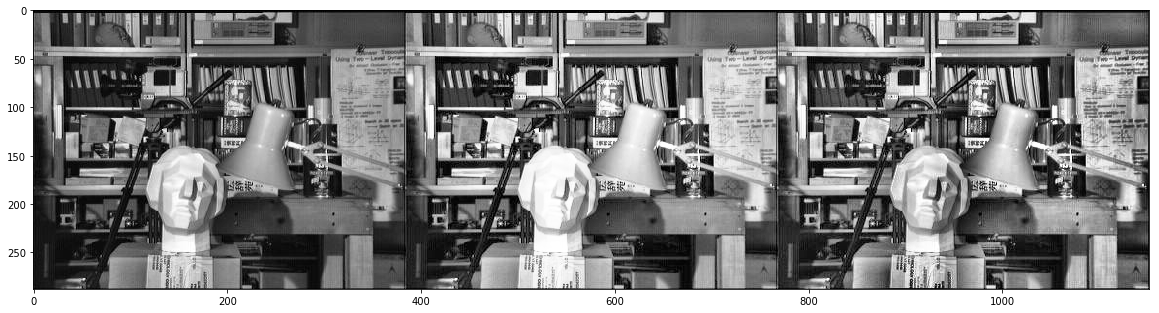

In [345]:
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack((img, equ, cl1)), 'gray')

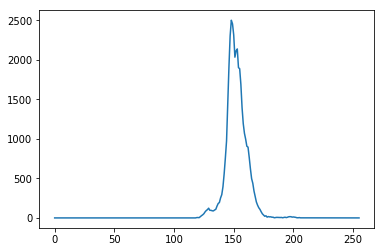

In [347]:
img = cv.imread('hist.jpg', 0)
mask = np.zeros(img.shape, dtype=np.uint8)
mask[:200, :200] = 255

hist_mask = cv.calcHist([img], [0], mask, [256], [0, 256])

plt.plot(hist_mask)
plt.show()

## Template Matching cv2.matchTemplate()
find objects in an image



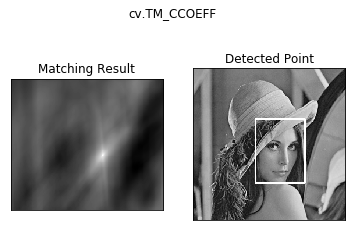

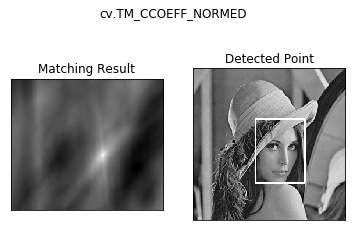

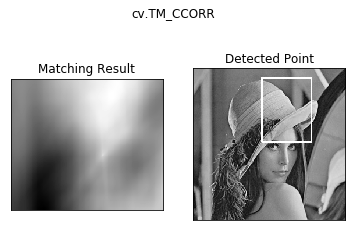

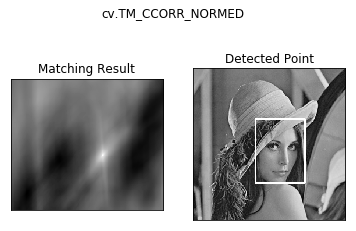

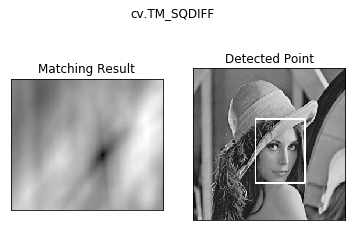

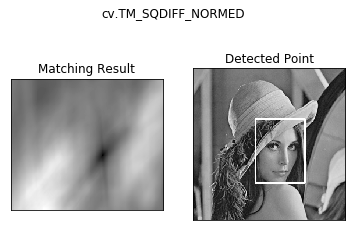

In [384]:
img = cv.imread('lena.jpg',0)
img2 = img.copy()
template = cv.imread('face.jpg',0)
h, w = template.shape[:2]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

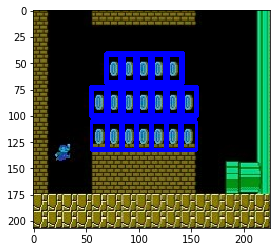

In [387]:
img_rgb = cv.imread('mario.jpg', 1)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.jpg',0)
w, h = template.shape[::-1]


res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8


loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    plt.imshow(img_rgb, cmap = 'gray')

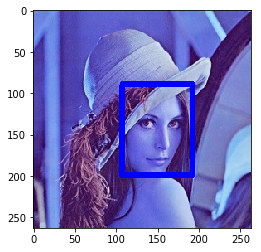

In [390]:
img_rgb = cv.imread('lena.jpg', 1)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('face.jpg',0)
w, h = template.shape[::-1]


res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8


loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    plt.imshow(img_rgb, cmap = 'gray')